In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re


In [5]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords=stopwords.words("english")
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\soory\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\soory\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
url="https://raw.githubusercontent.com/Sooryak12/FakeReviewDetectionLSTM/master/selected.txt"


In [7]:
df=pd.read_csv(url,delimiter="\t")
df.head()

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT
0,1,__label1__,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav..."
1,2,__label1__,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...
2,3,__label1__,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...
3,4,__label1__,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...
4,5,__label1__,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...


In [8]:
df.isnull().sum()

DOC_ID               0
LABEL                0
RATING               0
VERIFIED_PURCHASE    0
PRODUCT_CATEGORY     0
PRODUCT_ID           0
PRODUCT_TITLE        0
REVIEW_TITLE         0
REVIEW_TEXT          0
dtype: int64

In [9]:
df["PRODUCT_CATEGORY"].value_counts()

Outdoors                  700
Furniture                 700
Electronics               700
Lawn and Garden           700
Books                     700
Office Products           700
Watches                   700
Jewelry                   700
Sports                    700
Pet Products              700
Health & Personal Care    700
Apparel                   700
Beauty                    700
Kitchen                   700
Home                      700
Grocery                   700
PC                        700
Tools                     700
Toys                      700
Home Improvement          700
Wireless                  700
Home Entertainment        700
Baby                      700
Luggage                   700
Camera                    700
Shoes                     700
Video Games               700
Automotive                700
Musical Instruments       700
Video DVD                 700
Name: PRODUCT_CATEGORY, dtype: int64

In [10]:
df["LABEL"]=df["LABEL"].replace(['__label2__','__label1__'],['0','1'])

In [11]:
dfs=df[["REVIEW_TEXT","LABEL","PRODUCT_CATEGORY"]]
dfs = dfs.rename(columns={'REVIEW_TEXT': 'reviews',"LABEL":"label","PRODUCT_CATEGORY":"cat"})

In [12]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  21000 non-null  object
 1   label    21000 non-null  object
 2   cat      21000 non-null  object
dtypes: object(3)
memory usage: 492.3+ KB


In [13]:
dfs["reviews"]=dfs["reviews"].apply(lambda x:x.lower())
dfs["reviews"] = dfs["reviews"].apply(lambda x: re.sub("[^a-zA-Z]", " ", x))
dfs["reviews"] = dfs["reviews"].apply(lambda x: re.sub("\s+", " ", x))

In [14]:
dfs["label"].value_counts()

0    10500
1    10500
Name: label, dtype: int64

The Data is Unbiased

In [15]:
dfs.head()

,reviews,label,cat
0,when least you think so this product will save...,1,PC
1,lithium batteries are something new introduced...,1,Wireless
2,i purchased this swing for my baby she is mont...,1,Baby
3,i was looking for an inexpensive desk calcolat...,1,Office Products
4,i only use it twice a week and the results are...,1,Beauty


In [16]:
"not" in stopwords

True

In [17]:
nltk.download('punkt')
def stop(text):
    clean_sent =[]
    for w in word_tokenize(text):
        if not w in stopwords:
            clean_sent.append(w)
    return " ".join(clean_sent)

wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(text):

    word_tokens = nltk.word_tokenize(text)
    lemmatized_word = [wordnet_lemmatizer.lemmatize(word) for word in word_tokens]
    return (" ".join(lemmatized_word))



def tokenizee(text):
    return word_tokenize(text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\soory\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
dfs["reviews"]=dfs["reviews"].apply(lemmatize)
dfs["reviews"]=dfs["reviews"].apply(stop)
dfs["reviews"]=dfs["reviews"].apply(tokenizee)


In [19]:
dfs["reviews"][10]

['unfortunately', 'work', 'made', 'sick', 'throw', 'two', 'time', 'tried']

In [20]:
length=[]
for i in range (len(dfs["reviews"])):
    length.append(len(dfs["reviews"][i]))

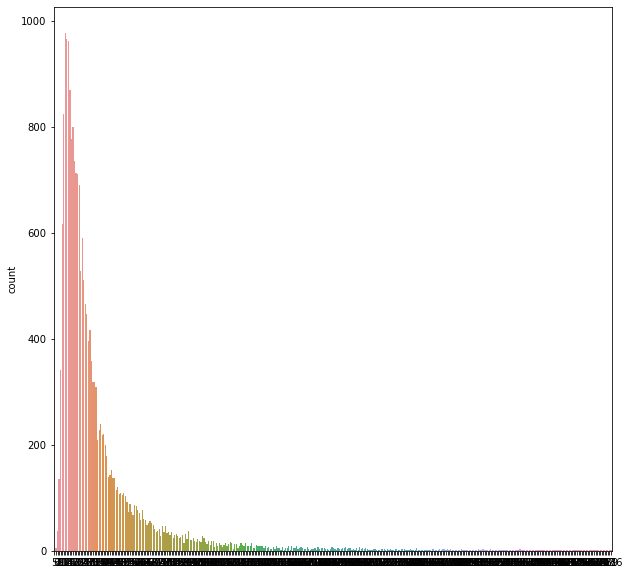

In [21]:
plt.figure(figsize=(10,10))
sns.countplot(length)
plt.show()

We see that there are many outliers and the data is heavily left skewed.So we have to do much more analysis to select the proper lenth for the text to embedd.

In [22]:
txt=" mean:{} \n median:{} \n maximum length:{} \n minimum length:{}".format(np.mean(length),np.median(length),np.max(length),np.min(length))

In [23]:
print(txt)

 mean:35.187714285714286 
 median:22.0 
 maximum length:1436 
 minimum length:5


In [24]:
def category(x):
    if 0<x<11:
        return 5
    elif 10<x<21:
        return 15
    elif 20<x<31:
        return 25
    elif 30<x<41:
        return 35
    elif 40<x<50:
        return 45
    elif 50<x<61:
        return 55
    elif 60<x<101:
        return 80
    elif 100<x<301:
        return 150
    elif 300<x<601:
        return 450
    elif 600<x<1001:
        return 800
    elif 1000<x<1501:
        return 1250
    

In [25]:
cat=[]
for i in range(len(length)):
    cat.append(category(length[i]))

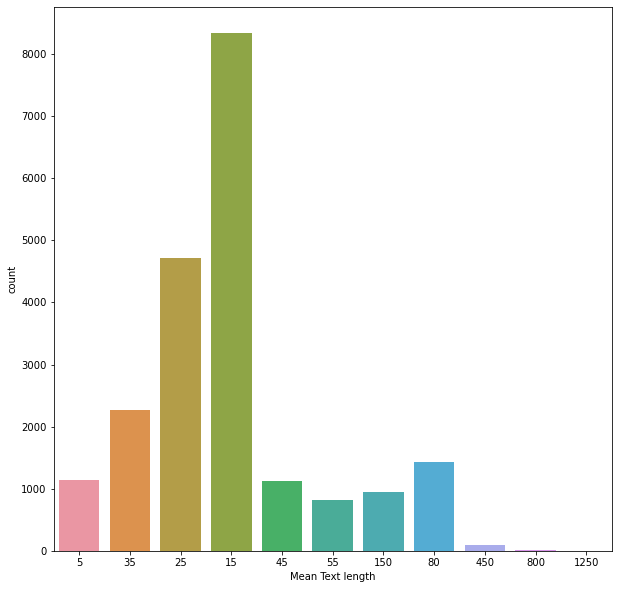

In [26]:
plt.figure(figsize=(10,10))
ax=sns.countplot(cat)
ax.set(xlabel="Mean Text length")
plt.show()

In [27]:
(15+25+35)/3

25.0

Ideal Text size will be of 30-40

In [28]:
c=0
for i in range(len(length)):
    if 40> length[i]>1:
      c+=1
print(c)

16321


Texts with text size >700 is just 7 .We can remove them.
The above mentioned values are the index of outliers.

In [29]:
len(length)

21000

In [30]:
19921/21000

0.9486190476190476

In [31]:
16321/21000

0.7771904761904762

In [32]:
19030/21000

0.9061904761904762

90% of the data lies with text size between 1 and 70.So we can remove all the other data.
77% of the data lies with text size between 40.As LSTM takes long time to train .This data is enough i guess.

In [33]:
dfs.columns

Index(['reviews', 'label', 'cat'], dtype='object')

In [34]:
dfs["length"]=length

In [35]:
dfs.head()

,reviews,label,cat,length
0,"[least, think, product, save, day, keep, aroun...",1,PC,10
1,"[lithium, battery, something, new, introduced,...",1,Wireless,40
2,"[purchased, swing, baby, month, ha, pretty, mu...",1,Baby,22
3,"[wa, looking, inexpensive, desk, calcolatur, w...",1,Office Products,21
4,"[use, twice, week, result, great, used, teeth,...",1,Beauty,27


In [36]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  21000 non-null  object
 1   label    21000 non-null  object
 2   cat      21000 non-null  object
 3   length   21000 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 656.4+ KB


In [37]:
dfs=dfs[dfs["length"]<41]

In [38]:
test_dfs=dfs

In [39]:
dfs=test_dfs

In [40]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16461 entries, 0 to 20998
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  16461 non-null  object
 1   label    16461 non-null  object
 2   cat      16461 non-null  object
 3   length   16461 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 643.0+ KB


In [41]:
dfs["label"]=dfs["label"].astype(np.float32)

we removed the outlier texts.

In [42]:
dfs["cat"].value_counts()

Jewelry                   648
Shoes                     633
Apparel                   622
Watches                   600
Office Products           584
Furniture                 580
Automotive                573
Wireless                  567
Home                      567
Musical Instruments       561
Outdoors                  556
Sports                    554
Tools                     554
Toys                      548
Lawn and Garden           546
Luggage                   545
Health & Personal Care    545
Home Improvement          539
Grocery                   537
Beauty                    536
Baby                      536
Video Games               534
Electronics               532
Pet Products              526
Kitchen                   524
PC                        523
Video DVD                 510
Camera                    505
Home Entertainment        459
Books                     417
Name: cat, dtype: int64

In [43]:
dfs["label"].value_counts()

1.0    8803
0.0    7658
Name: label, dtype: int64

In [44]:
dfs["reviews"][0]

['least',
 'think',
 'product',
 'save',
 'day',
 'keep',
 'around',
 'case',
 'need',
 'something']

In [45]:
def untokenize(textlist):
    sen=""
    for text in textlist:
        sen+=text
        sen+=" "
    return sen  

In [46]:
def untokenize2(s):  
    
    str1 = " " 
     
    return (str1.join(s)) 

In [47]:
test=["hi","hello","how","are","you"]

In [48]:
print(untokenize(test))
print(untokenize2(test))

hi hello how are you 
hi hello how are you


In [49]:
from sklearn.model_selection import train_test_split

In [50]:
dfs2=dfs

In [103]:
df_train[2]

'purchased swing baby month ha pretty much grown loud swing well beautiful though love color ha lot setting think wa worth money'

In [51]:
df_train,df_test,Ytrain,Ytest = train_test_split(dfs["reviews"],dfs["label"], test_size=0.2, random_state=101)

In [52]:
df_train=df_train.apply(untokenize2)

In [53]:
df_train[2]

'purchased swing baby month ha pretty much grown loud swing well beautiful though love color ha lot setting think wa worth money'

In [54]:
df_train

18322    love let driver know peaceful buddhist live st...
4183     finished reading certainly glad purchased book...
15057    love construction quality drawer drawer open s...
6018     juligo led headlamp comfortable wear cast nice...
449      stand paper towel soft feel like toilet paper ...
                               ...                        
2971     nothing like quality bed happy material though...
15747    bought shoe size chrat said size u eur receive...
6774     good price good size bought student sure love ...
9563     great game perfect beginner even veteran still...
16774    make short travel want organized buy today rig...
Name: reviews, Length: 13168, dtype: object

In [56]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.models import Model

In [99]:
MAX_VOCAB_SIZE=15600
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [100]:
word2idx = tokenizer.word_index
V = len(word2idx)

In [101]:
len(word2idx)

15597

In [102]:
print(df_train[0])
print(sequences_train[0])
print(word2idx["least"])
print(word2idx["day"])


least think product save day keep around case need something
[6, 447, 1170, 87, 8467, 6384, 548, 1579, 6385, 1488, 5268, 460]
380
37


In [70]:

# pad sequences so that we get a N x T matrix
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:',data_train.shape)

# get sequence length
T = data_train.shape[1]

Shape of data train tensor: (13168, 40)


In [71]:

data_test = pad_sequences(sequences_test,maxlen=T)
print('Shape of data test tensor:',data_test.shape)

Shape of data test tensor: (3293, 40)


In [72]:
data_test

array([[    0,     0,     0, ...,    97,   174,     5],
       [    0,     0,     0, ...,   690, 12497,   344],
       [    0,     0,     0, ...,  4392,  2388,  2598],
       ...,
       [    0,     0,     0, ...,   342,  4484,     6],
       [    0,     0,     0, ...,     7,   167,   487],
       [    0,     0,     0, ...,   112,   282,   166]])

In [62]:
# create the model

# We get to choose embeding dimensionality
D = 20

# Hidden stats dimensionality
M = 15

# Note: we actually want to the size of the embedding to (V+1) x D.
# because the first index starts from 1 and not 0.
# Thus, if the final index of the embedding matrix is V,
# then it actually must have size V+1.

i = Input(shape=(T,))
x = Embedding(V+1,D)(i)
x = LSTM(M,return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i,x)

In [67]:
 #Compile and fit
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
print('Training model....')
r=model.fit(
    data_train,
    Ytrain,
    batch_size=64,
    epochs=10,
    validation_data=(data_test,Ytest)
)

Training model....
Train on 13168 samples, validate on 3293 samples
Epoch 1/10
13168/13168 [==============================] - 7s 542us/sample - loss: 0.1048 - accuracy: 0.9626 - val_loss: 1.4297 - val_accuracy: 0.5852
Epoch 2/10
13168/13168 [==============================] - 4s 327us/sample - loss: 0.0809 - accuracy: 0.9704 - val_loss: 1.6378 - val_accuracy: 0.5849
Epoch 3/10
13168/13168 [==============================] - 4s 328us/sample - loss: 0.0688 - accuracy: 0.9757 - val_loss: 1.6668 - val_accuracy: 0.5873
Epoch 4/10
13168/13168 [==============================] - 4s 334us/sample - loss: 0.0560 - accuracy: 0.9810 - val_loss: 1.6852 - val_accuracy: 0.5882
Epoch 5/10
13168/13168 [==============================] - 4s 334us/sample - loss: 0.0519 - accuracy: 0.9820 - val_loss: 1.7130 - val_accuracy: 0.5900
Epoch 6/10
13168/13168 [==============================] - 4s 334us/sample - loss: 0.0498 - accuracy: 0.9827 - val_loss: 1.8164 - val_accuracy: 0.5934
Epoch 7/10
13168/13168 [========

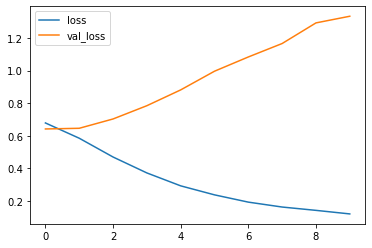

In [64]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

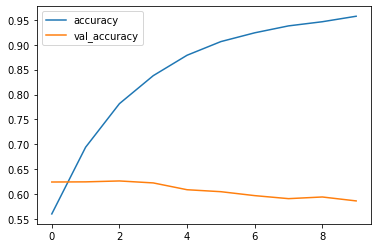

In [65]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [ ]:
Without batch_size:
Epoch 10/10
13168/13168 [==============================] - 10s 788us/sample - loss: 0.1205 - accuracy: 0.9572 - val_loss: 1.3333 - val_accuracy: 0.5864
with batch_size=64:
Epoch 10/10
13168/13168 [==============================] - 4s 339us/sample - loss: 0.0331 - accuracy: 0.9891 - val_loss: 2.0885 - val_accuracy: 0.5858
